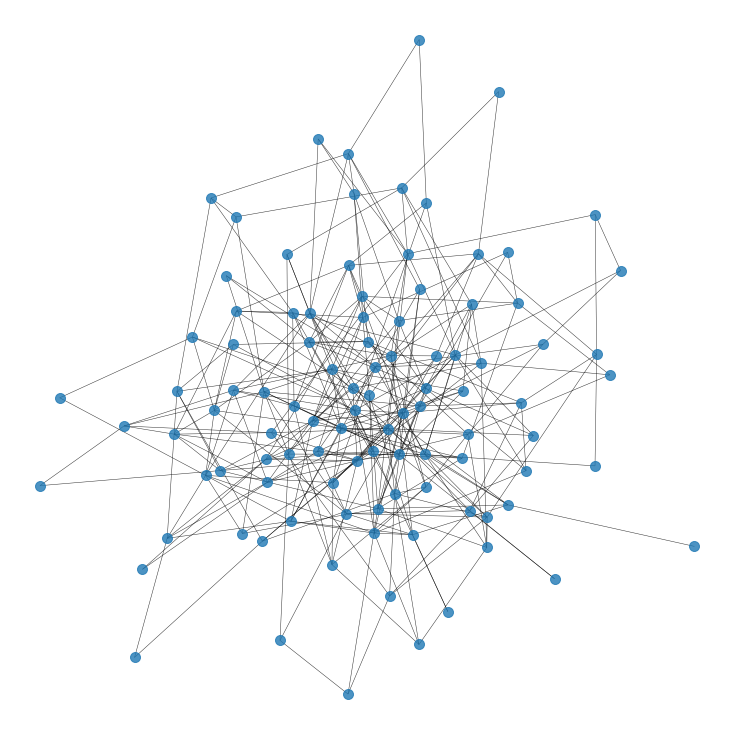

In [4]:
# Question 1 (1)
# reference on: https://networkx.github.io/documentation/stable/auto_examples/graph/plot_erdos_renyi.html#sphx-glr-auto-examples-graph-plot-erdos-renyi-py
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
# set figure size
plt.figure(figsize=(10, 10))
# set the nodes and edges graph
nodes = 100  # 100 nodes
edges = 300  # 100*3 edges
G = nx.gnm_random_graph(nodes, edges, seed = 000)

# set the options of graph
options = {'alpha': 0.8,
          'node_size': 100,
           'width': 0.5
          }

nx.draw(G, **options)
plt.show()

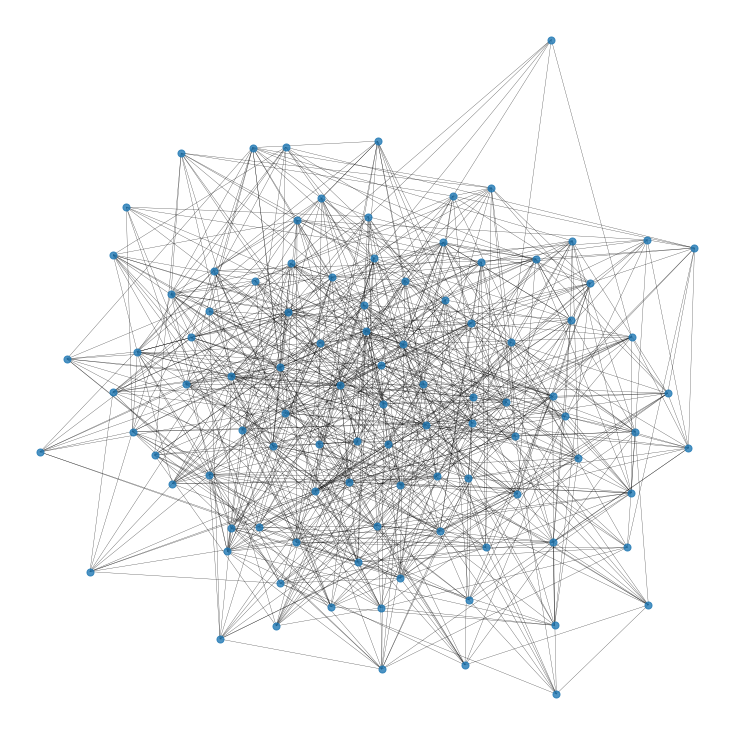

In [5]:
# Question 1 (2)
# set the nodes and edges graph
plt.figure(figsize=(10,10))
nodes = 100  # 100 nodes
edges = 800  # 100*8 edges
G = nx.gnm_random_graph(nodes, edges, seed = 000)

# set the options of graph
options = {'alpha': 0.8,
          'node_size': 50,
           'width': 0.3
          }

nx.draw(G, **options)
plt.show()

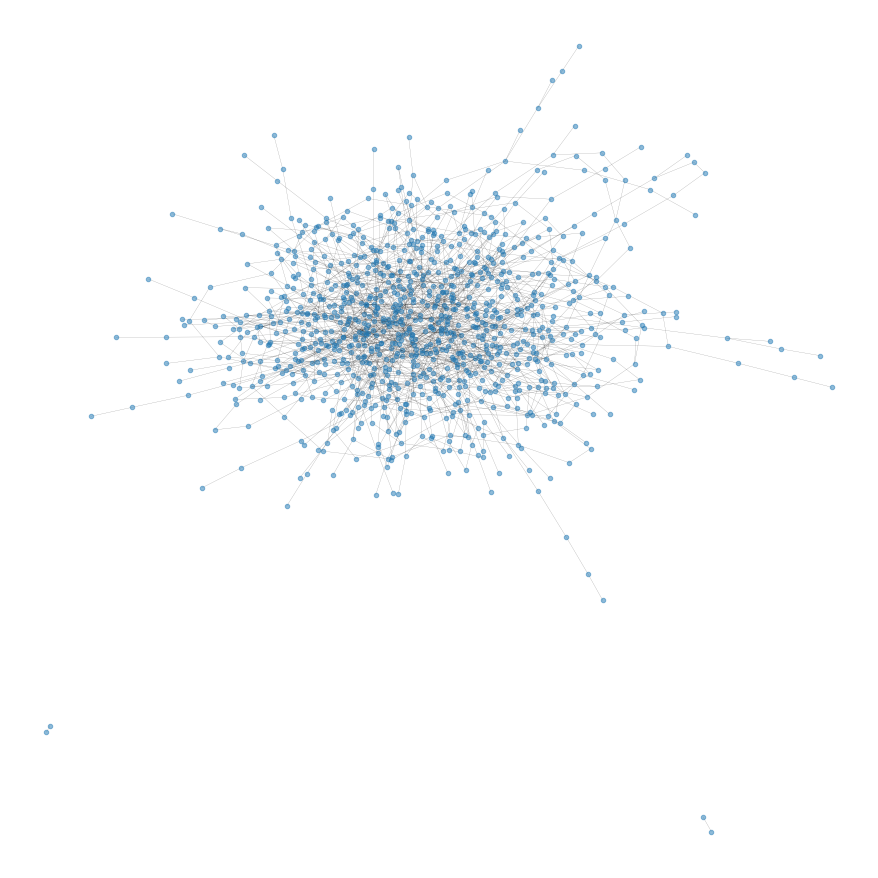

In [3]:
#Question2 
#reference on: https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.degree_seq.random_degree_sequence_graph.html#networkx.generators.degree_seq.random_degree_sequence_graph
#use the given_degree_sequence_graph
plt.figure(figsize=(12,12))

#generate random weighted edges sequence
k = np.linspace(1, 10, 10)
pk = [0.1, 0.35, 0.25 ,0.1 ,0.1, 0.04, 0.01, 0.02, 0.02, 0.01]  #probability of k
np.random.seed(123)
edges = np.random.choice(k, size = 1000, p = pk)


#random_degree_sequence_graph(sequence, seed=None, tries=10)
G = nx.random_degree_sequence_graph(edges, seed = 000)
options = {'alpha': 0.5,
          'node_size': 20,
           'width': 0.2
          }

nx.draw(G, **options)

In [7]:
#Question3
#Assume 100 users (mode_1), 8 songs (mode_2)
users = np.linspace(1, 100, 100)
songs = np.linspace(1, 12, 12)
k = np.linspace(1, 5, 5)
probk = [0.1, 0.1, 0.35, 0.25, 0.2]

#generate random edges
np.random.seed(000)
edges = np.random.choice(k, size=100, p=probk)
print(edges)

#create users_startnode
user_startnode = []
for i in range(100):
    append_index = np.repeat(users[i], edges[i])
    user_startnode.append(append_index)
user_startnode

#concateante arrays into a whole one
user_startnode = np.concatenate(user_startnode).astype(int)
print(user_startnode)
len(user_startnode)

[3. 4. 4. 3. 3. 4. 3. 5. 5. 3. 4. 3. 4. 5. 1. 1. 1. 5. 4. 5. 5. 4. 3. 4.
 2. 4. 2. 5. 3. 3. 3. 4. 3. 4. 1. 4. 4. 4. 5. 4. 3. 3. 4. 1. 4. 4. 3. 2.
 3. 3. 4. 3. 5. 2. 3. 2. 4. 3. 3. 3. 2. 2. 4. 2. 2. 3. 5. 1. 5. 1. 5. 3.
 5. 4. 4. 1. 3. 2. 3. 2. 3. 3. 1. 4. 4. 3. 3. 1. 4. 5. 3. 4. 2. 4. 3. 2.
 4. 1. 5. 1.]
[  1   1   1   2   2   2   2   3   3   3   3   4   4   4   5   5   5   6
   6   6   6   7   7   7   8   8   8   8   8   9   9   9   9   9  10  10
  10  11  11  11  11  12  12  12  13  13  13  13  14  14  14  14  14  15
  16  17  18  18  18  18  18  19  19  19  19  20  20  20  20  20  21  21
  21  21  21  22  22  22  22  23  23  23  24  24  24  24  25  25  26  26
  26  26  27  27  28  28  28  28  28  29  29  29  30  30  30  31  31  31
  32  32  32  32  33  33  33  34  34  34  34  35  36  36  36  36  37  37
  37  37  38  38  38  38  39  39  39  39  39  40  40  40  40  41  41  41
  42  42  42  43  43  43  43  44  45  45  45  45  46  46  46  46  47  47
  47  48  48  49  49  49  50  50  50 

322

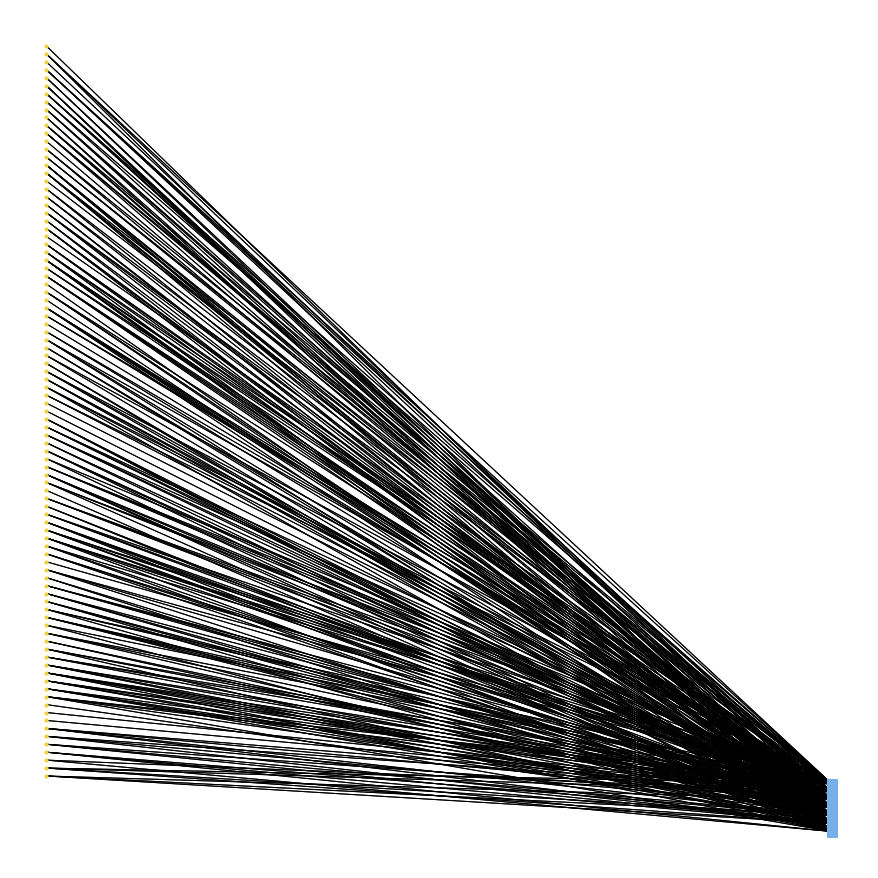

In [12]:
plt.figure(figsize=(12, 12))
#create songs_endnote
#first count the number of edges
len(user_startnode)    #result 322
songs_endnote = np.random.randint(1, 12, size = len(user_startnode))
songs_endnote

#create dataframe
df = pd.DataFrame({'user': user_startnode, 'song': songs_endnote})
df
B = nx.Graph()

# add user nodes
users = df['user'].unique()
B.add_nodes_from(users, bipartite=0)
# add song/product nodes
songs = df['song'].unique()
B.add_nodes_from(songs, bipartite=1)
# Add edges only between nodes of opposite node sets
edges = list(zip(df.user, df.song))
B.add_edges_from(edges)

# fix positions for user nodes
pos = {node: [0, i] for i, node in enumerate(users)}

# fix positions for song/product nodes
pos.update({node: [1, i] for i, node in enumerate(songs)})

# draw the network - user nodes
nx.draw(B,
        pos,
        nodelist=list(users),
        node_color='#f4d142',
        with_labels=False,
        node_size=10,
        font_size=10)

# draw the network - song/product nodes
nx.draw(B,
        pos,
        nodelist=list(songs),
        node_color='#77afea',
        node_shape='s',
        with_labels=False,
        node_size=90,
        font_size=10)

#draw the network
plt.show()